### Task 6 - Decision tree classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(["Id"],axis=1)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = df.iloc[:,:-1].values

In [9]:
Y = df.iloc[:,-1]

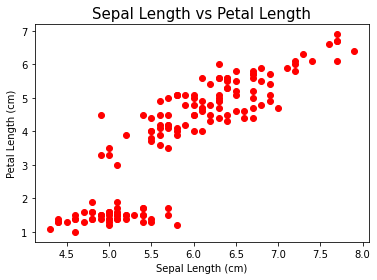

In [15]:
### Let us plot the sepal length vs petal length

plt.scatter(X[:,0],X[:,2], color='red')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Length vs Petal Length",fontsize=15)
plt.show()

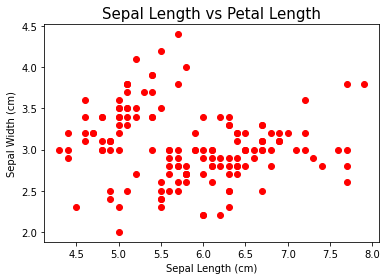

In [16]:
### Let us plot the sepal length vs sepal width

plt.scatter(X[:,0],X[:,1], color='red')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Petal Length",fontsize=15)
plt.show()

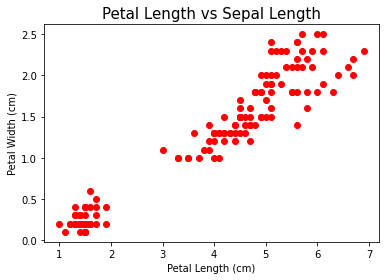

In [18]:
### Let us plot the petal length vs petal width

plt.scatter(X[:,2],X[:,3], color='red')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Sepal Length",fontsize=15)
plt.show()

### Let us classify using Decision Tree classifier

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

In [22]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [23]:
Y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

score = accuracy_score(Y_test,Y_pred)

print("The accuracy of the decision tree model with gini index as criterion is: - ",score)

The accuracy of the decision tree model with gini index as criterion is: -  0.9666666666666667


In [25]:
### Let us predict tranining accuracy

Y_pred_train = model.predict(X_train)

In [26]:
score1 = accuracy_score(Y_train,Y_pred_train)

print("The accuracy of the decision tree model on training set with gini index as criterion is: - ",score1)

The accuracy of the decision tree model on training set with gini index as criterion is: -  0.9666666666666667


### Since both the accuracies are same, there is no overfitting

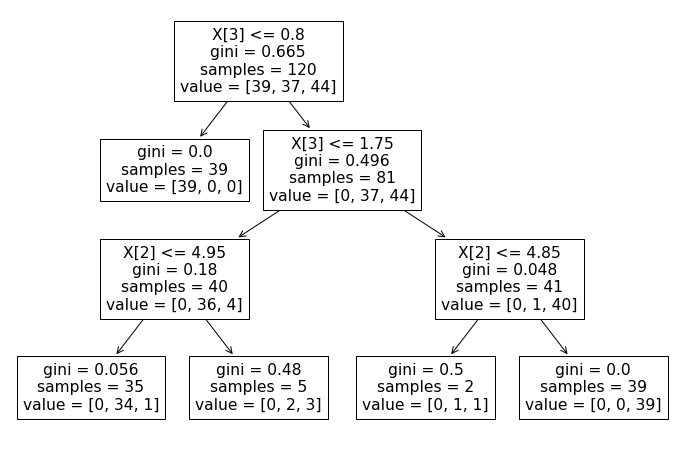

In [28]:
### Let us visualise the decision tree

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(X_train,Y_train))
plt.show()

### Let us save the model

In [30]:
import pickle as pkl

model = pkl.dump(model,open("model.pkl","wb"))

In [33]:
model1 = pkl.load(open("model.pkl","rb"))

In [34]:
model1.predict([[5.1,3.5,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

Hence, the model is classifying correctly.